>### Best 50 Exercises for your body

## ***Basics EDA***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("data/Top 50 Excerice for your body.csv")
df.head(4)

,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level
0,Push-ups,3,15,Builds upper body strength,200,"Chest, Triceps, Shoulders",NaN,Intermediate
1,Squats,4,12,Strengthens lower body,223,"Quadriceps, Hamstrings, Glutes",NaN,Beginner
2,Lunges,3,10,Improves balance and coordination,275,"Quadriceps, Hamstrings, Glutes",NaN,Beginner
3,Burpees,3,10,Full body workout,355,Full Body,NaN,Advanced


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Exercise             50 non-null     object
 1   Sets                         50 non-null     int64 
 2   Reps                         50 non-null     int64 
 3   Benefit                      50 non-null     object
 4   Burns Calories (per 30 min)  50 non-null     int64 
 5   Target Muscle Group          50 non-null     object
 6   Equipment Needed             30 non-null     object
 7   Difficulty Level             50 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.3+ KB


In [7]:
df.isna().sum()

Name of Exercise                0
Sets                            0
Reps                            0
Benefit                         0
Burns Calories (per 30 min)     0
Target Muscle Group             0
Equipment Needed               20
Difficulty Level                0
dtype: int64

In [8]:
# Replacing NaN values in 'Equipment Needed' column with 'NEN' (No Equipment Needed)
df['Equipment Needed'].fillna('NEN', inplace=True)
df.head()

,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level
0,Push-ups,3,15,Builds upper body strength,200,"Chest, Triceps, Shoulders",NEN,Intermediate
1,Squats,4,12,Strengthens lower body,223,"Quadriceps, Hamstrings, Glutes",NEN,Beginner
2,Lunges,3,10,Improves balance and coordination,275,"Quadriceps, Hamstrings, Glutes",NEN,Beginner
3,Burpees,3,10,Full body workout,355,Full Body,NEN,Advanced
4,Mountain Climbers,3,20,Improves cardiovascular fitness,240,"Core, Shoulders, Legs",NEN,Intermediate


In [16]:
df.count()


Name of Exercise               50
Sets                           50
Reps                           50
Benefit                        50
Burns Calories (per 30 min)    50
Target Muscle Group            50
Equipment Needed               50
Difficulty Level               50
dtype: int64

## ***Calories Burned by Each Exercise***

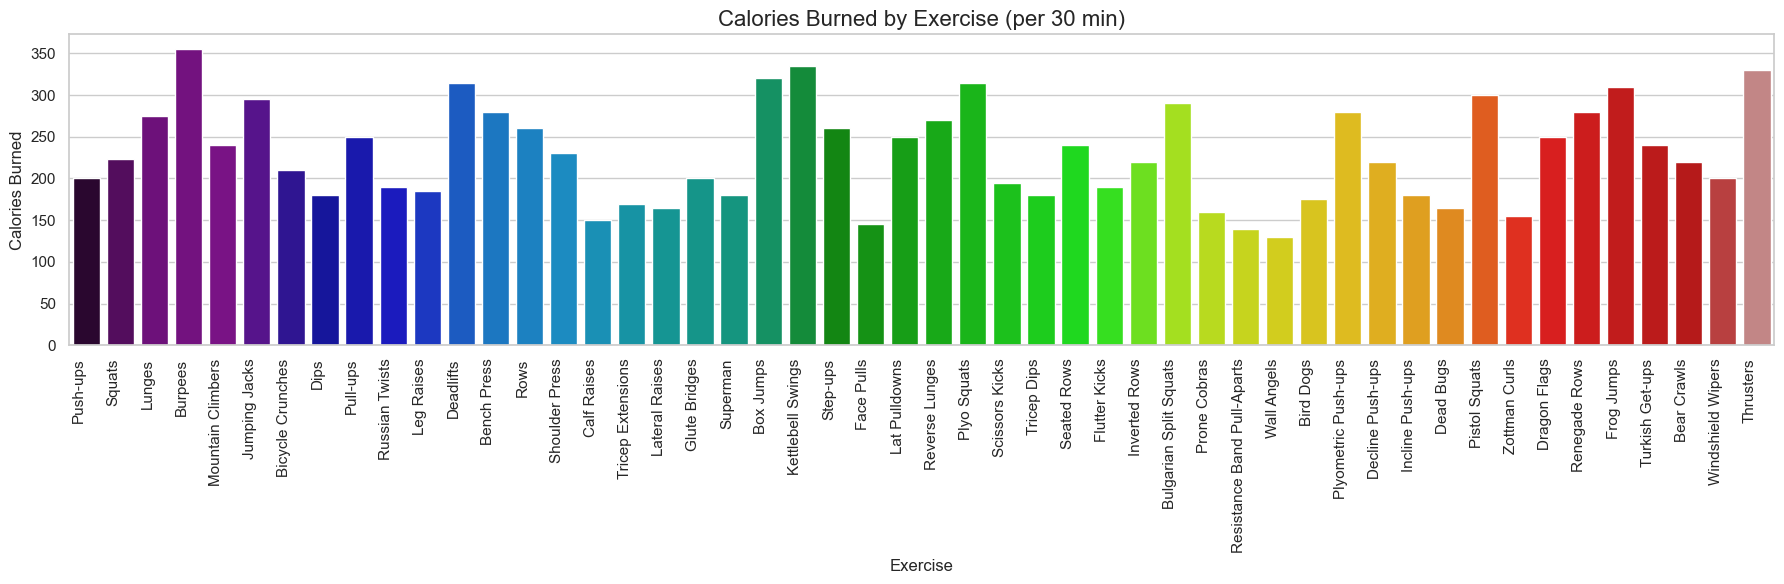

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 6))
sns.barplot(x='Name of Exercise', y='Burns Calories (per 30 min)', data=df, palette='nipy_spectral')

plt.title('Calories Burned by Exercise (per 30 min)', fontsize=16)
plt.xlabel('Exercise', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.savefig('img/calories_burned.png')
plt.show()

## ***Top 10 Exercises by Calories Burned***

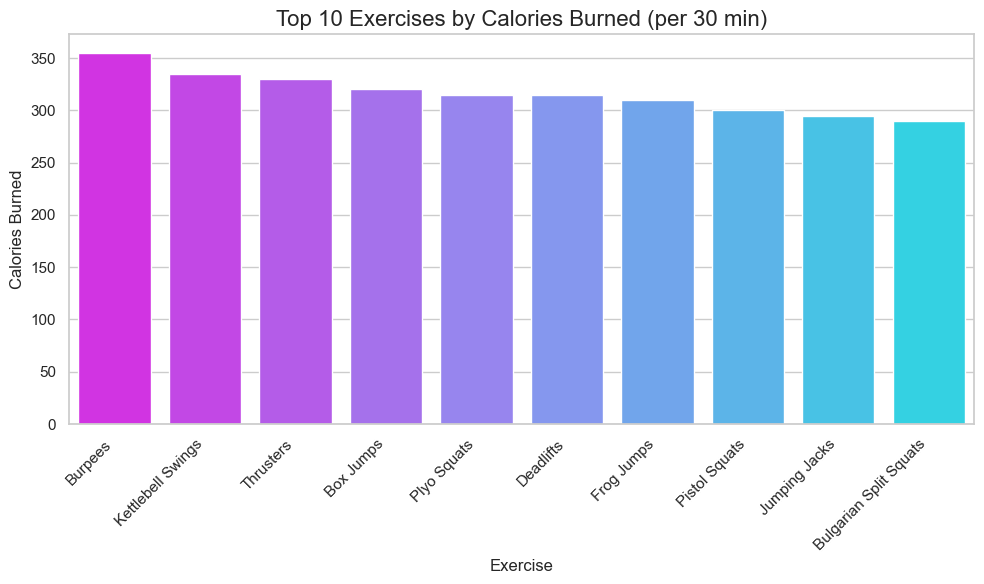

In [22]:
top_10_exercises = df.sort_values(by='Burns Calories (per 30 min)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Name of Exercise', y='Burns Calories (per 30 min)', data=top_10_exercises, palette='cool_r')

plt.title('Top 10 Exercises by Calories Burned (per 30 min)', fontsize=16)
plt.xlabel('Exercise', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('top_10_calories_burned.png')
plt.show()

## ***Relation beyween Sets, Reps, and Calories Burned***

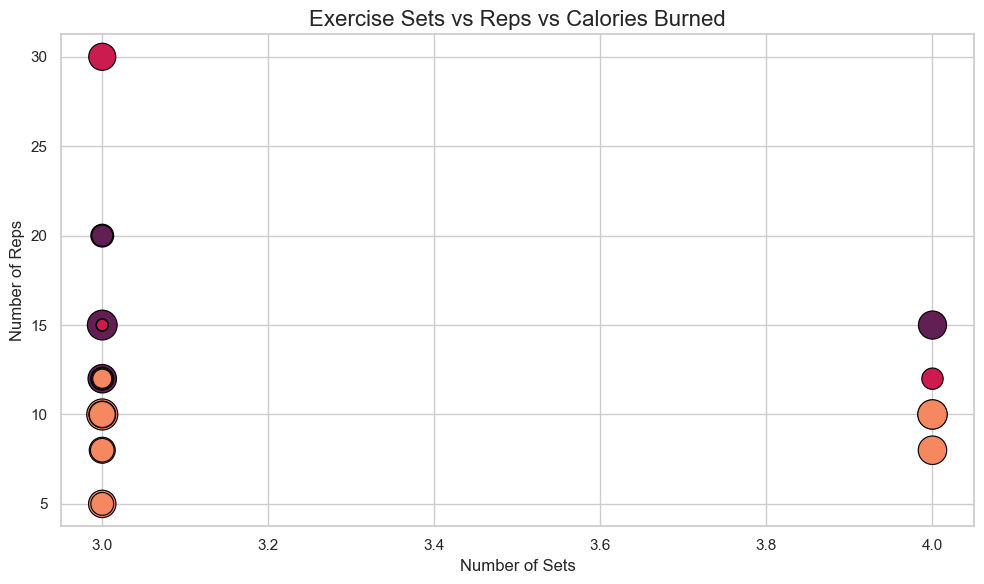

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sets', y='Reps', size='Burns Calories (per 30 min)', hue='Difficulty Level', 
                data=df, sizes=(50, 500), palette='rocket', edgecolor='black', legend=False)

plt.title('Exercise Sets vs Reps vs Calories Burned', fontsize=16)
plt.xlabel('Number of Sets', fontsize=12)
plt.ylabel('Number of Reps', fontsize=12)

plt.tight_layout()
plt.savefig('relation_betn_sets_reps_calories')
plt.show()

## ***Number of Exercises by difficulties level***

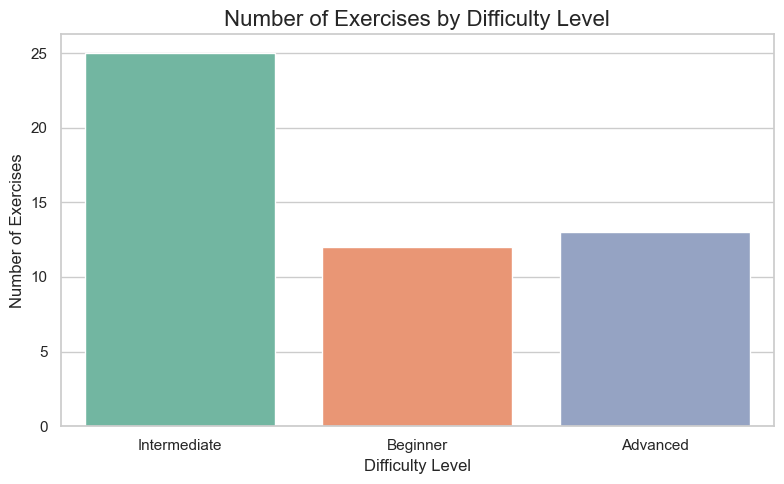

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Difficulty Level', palette='Set2')

plt.title('Number of Exercises by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Number of Exercises', fontsize=12)

plt.tight_layout()
plt.show()

***Intermediate level Exercises seems higher in numbers folowed by Advanced and Beginner***

## ***Let's Explore Pushups***

<Figure size 640x480 with 0 Axes>

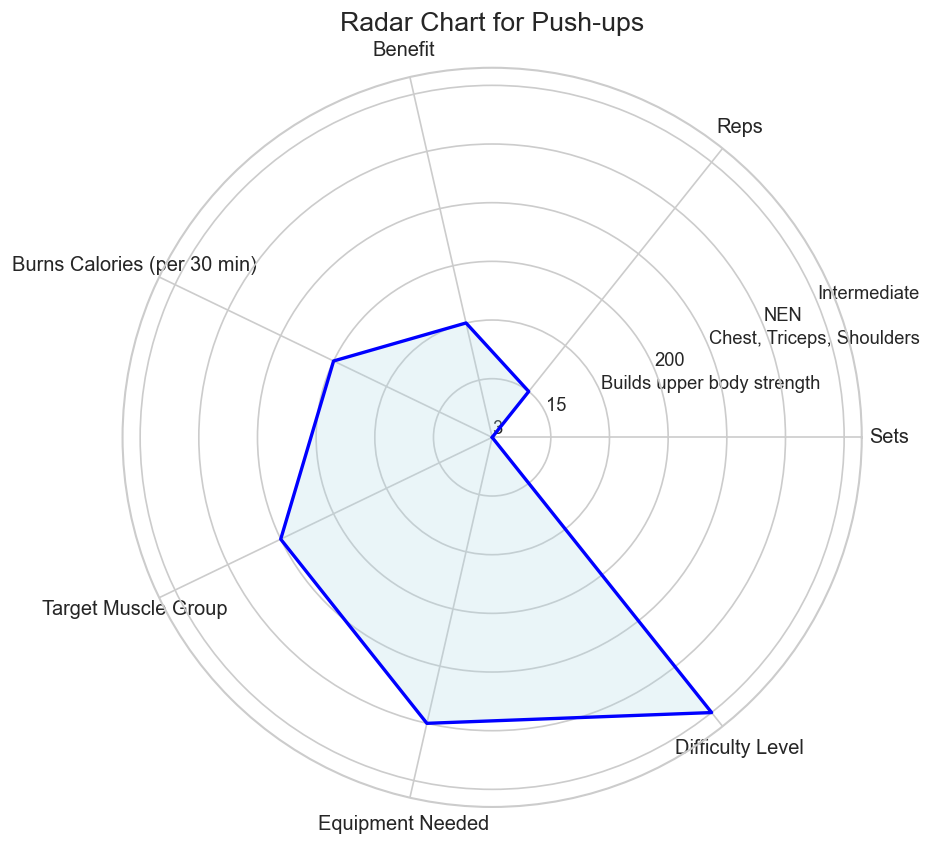

In [27]:
import numpy as np

# Function to create radar chart
def create_radar_chart(data, exercise_name):
    # Number of variables
    num_vars = len(data.columns) - 1 # Exclude the exercise name

    # angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # As this graph is circular graph, we need to "complete the loop"
    values = data.loc[data['Name of Exercise'] == exercise_name].values.flatten()[1:].tolist()
    values += values[:1] 
    angles += angles[:1]

    plt.figure(figsize=(8, 8), dpi=120)
    ax = plt.subplot(111, polar=True)
    ax.fill(angles, values, color='lightblue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    plt.xticks(angles[:-1], data.columns[1:], fontsize=12)
    plt.title(f'Radar Chart for {exercise_name}', fontsize=16)
    
    plt.show()

exercise_to_display = 'Push-ups'
plt.savefig('img/radar_chart_pusups.png')
create_radar_chart(df, exercise_to_display)

## ***Let's Explore Burpees***

<Figure size 640x480 with 0 Axes>

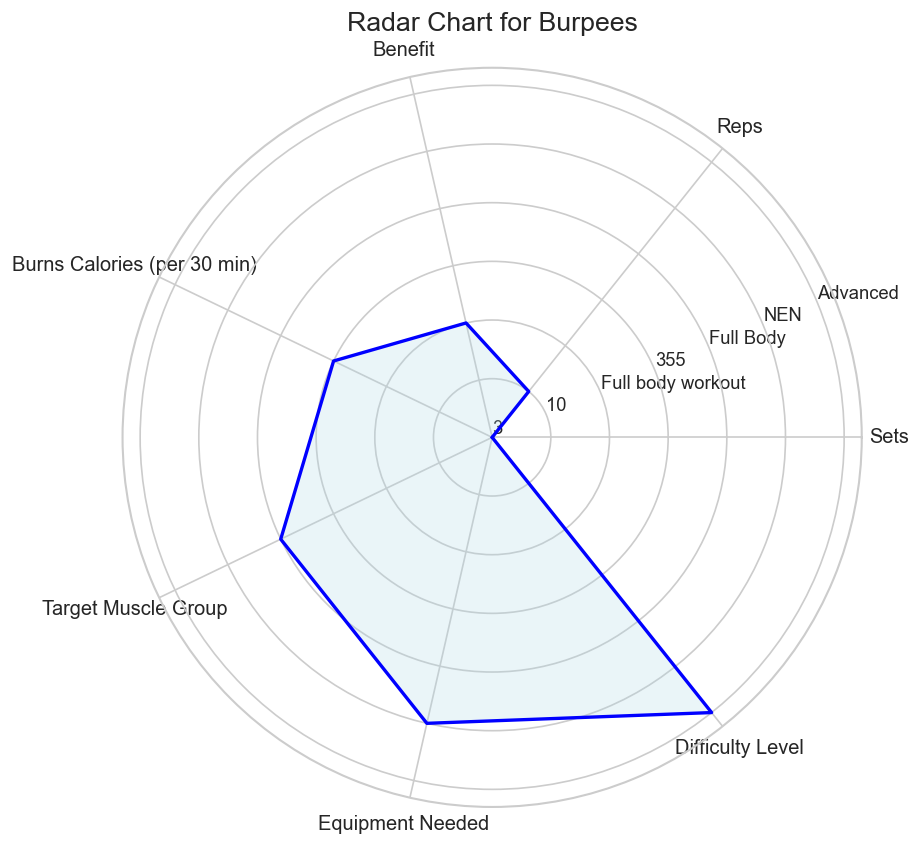

In [31]:
import numpy as np

# Function to create radar chart
def create_radar_chart(data, exercise_name):
    # Number of variables
    num_vars = len(data.columns) - 1 # Exclude the exercise name

    # angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # As this graph is circular graph, we need to "complete the loop"
    values = data.loc[data['Name of Exercise'] == exercise_name].values.flatten()[1:].tolist()
    values += values[:1] 
    angles += angles[:1]

    plt.figure(figsize=(8, 8), dpi=120)
    ax = plt.subplot(111, polar=True)
    ax.fill(angles, values, color='lightblue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    plt.xticks(angles[:-1], data.columns[1:], fontsize=12)
    plt.title(f'Radar Chart for {exercise_name}', fontsize=16)
    
    plt.show()

exercise_to_display = 'Burpees'
plt.savefig('img/radar_chart_burpees.png')
create_radar_chart(df, exercise_to_display)

In [29]:
df.head()

,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level
0,Push-ups,3,15,Builds upper body strength,200,"Chest, Triceps, Shoulders",NEN,Intermediate
1,Squats,4,12,Strengthens lower body,223,"Quadriceps, Hamstrings, Glutes",NEN,Beginner
2,Lunges,3,10,Improves balance and coordination,275,"Quadriceps, Hamstrings, Glutes",NEN,Beginner
3,Burpees,3,10,Full body workout,355,Full Body,NEN,Advanced
4,Mountain Climbers,3,20,Improves cardiovascular fitness,240,"Core, Shoulders, Legs",NEN,Intermediate


## ***Workouts which is Beginner Friendly and don't need Equipments too***

In [44]:
filtered_workouts = no_equipment_workouts[no_equipment_workouts['Difficulty Level'].isin(['Beginner', 'Intermediate'])]
display(filtered_workouts)

,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level
0,Push-ups,3,15,Builds upper body strength,200,"Chest, Triceps, Shoulders",NEN,Intermediate
1,Squats,4,12,Strengthens lower body,223,"Quadriceps, Hamstrings, Glutes",NEN,Beginner
2,Lunges,3,10,Improves balance and coordination,275,"Quadriceps, Hamstrings, Glutes",NEN,Beginner
4,Mountain Climbers,3,20,Improves cardiovascular fitness,240,"Core, Shoulders, Legs",NEN,Intermediate
5,Jumping Jacks,3,30,Improves coordination and cardiovascular health,295,Full Body,NEN,Beginner
6,Bicycle Crunches,3,20,Targets abdominal muscles,210,Core,NEN,Intermediate
10,Leg Raises,3,15,Strengthens lower abs,185,Lower Abs,NEN,Intermediate
18,Glute Bridges,3,15,Activates and strengthens glutes,200,"Glutes, Hamstrings",NEN,Beginner
19,Superman,3,12,Improves lower back strength,180,"Lower Back, Glutes",NEN,Beginner
26,Plyo Squats,3,12,Builds lower body power,315,"Quadriceps, Glutes",NEN,Intermediate


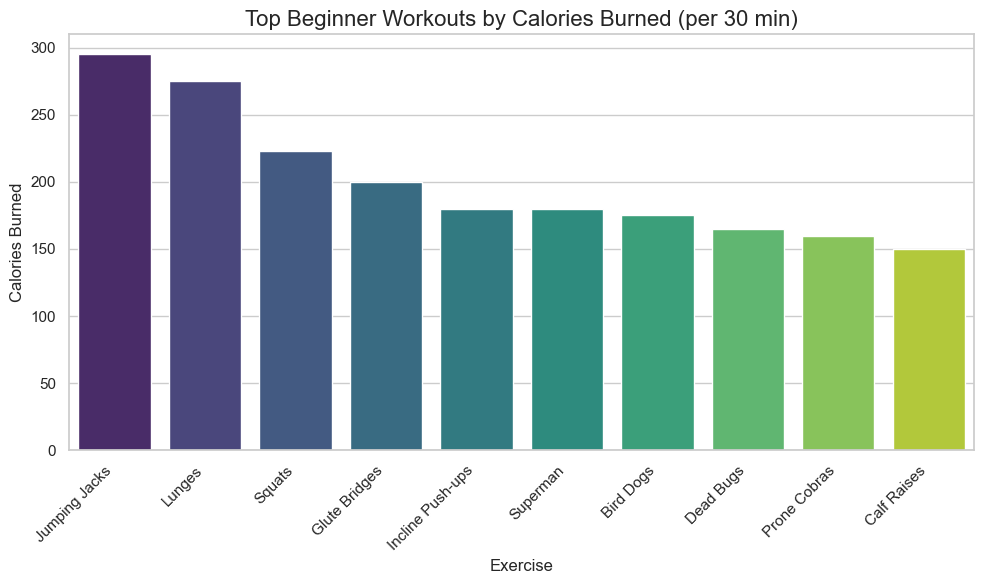

In [45]:
# Filter the top beginner workouts
beginner_top_workouts = df[df['Difficulty Level'] == 'Beginner'].sort_values(by='Burns Calories (per 30 min)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Name of Exercise', y='Burns Calories (per 30 min)', data=beginner_top_workouts, palette='viridis')

plt.title('Top Beginner Workouts by Calories Burned (per 30 min)', fontsize=16)
plt.xlabel('Exercise', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('img/top_beginner_workouts.png')
plt.show()


### Summary and Findings

- Most exercises are **intermediate level**.
- Missing 'Equipment Needed' values marked as **NEN** (No Equipment Needed).
- **Top 10 calorie-burners** visualized—showing the best for max burn.
- **Calories vs. Sets/Reps**: Scatter plot shows the higher the sets/reps, the higher the burn, with colors indicating difficulty.
- Radar charts for exercises like **Push-ups** and **Burpees**—see their benefits in one view.
- **Beginner-friendly** no-equipment workouts identified—easy but effective options.
- **Top beginner workouts** for calorie-burn highlighted.
- Exercises categorized by **target muscle groups** for easy selection.
- A **day-by-day workout plan** crafted for balanced gains and daily calorie tracking.